In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as path_join

csv = pd.read_csv(path_join('results', '2022-03-13_18-08-24.csv'))
train = csv['Accuracy']
vali = csv['Validation Accuracy']

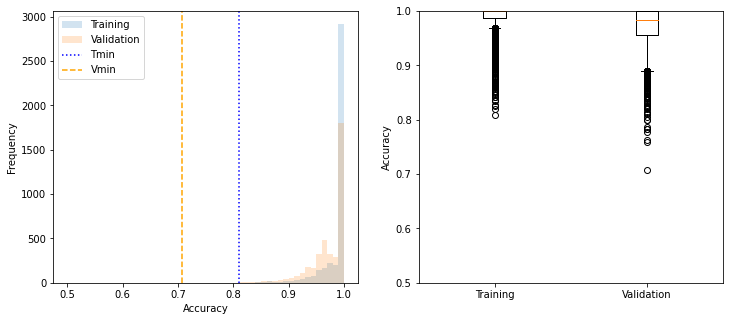

In [3]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1,2,1)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Frequency')
ax.hist(train,50,range=(0.5,1),alpha=0.2,label='Training')
ax.hist(vali,50,range=(0.5,1),alpha=0.2,label='Validation')
ax.axvline(train.min(),c='b',ls=':',label='Tmin')
ax.axvline(vali.min(),c='orange',ls='--',label='Vmin')
ax.legend()

axax = fig.add_subplot(1,2,2)
axax.boxplot([train,vali],positions=[1,2])
axax.set_ylabel('Accuracy')
axax.set_xticklabels(['Training','Validation'])
axax.set_ylim((0.5, 1))
plt.show()

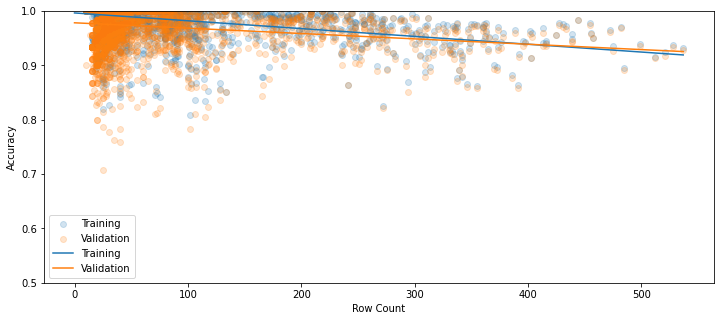

In [14]:
plt.figure(figsize=(12, 5))
row_counts = csv["Row Count"]

row_counts_linspace = np.linspace(0, row_counts.max(), 1000)

train_slope, train_intercept = np.polyfit(row_counts, train, 1)
vali_slope, vali_intercept = np.polyfit(row_counts, vali, 1)

plt.scatter(row_counts, train, label="Training", alpha=0.2)
plt.scatter(row_counts, vali, label="Validation", alpha=0.2)
plt.ylabel("Accuracy")
plt.xlabel("Row Count")
plt.ylim((0.5, 1))


plt.plot(
    row_counts_linspace,
    train_slope * row_counts_linspace + train_intercept,
    label="Training",
)
plt.plot(
    row_counts_linspace,
    vali_slope * row_counts_linspace + vali_intercept,
    label="Validation",
)

plt.legend()

plt.show()
